In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel('BostonHousing.xls','Data')

# Finding Missing Values

In [2]:
df.dtypes

CRIM       float64
ZN         float64
INDUS       object
CHAS         int64
NOX         object
RM         float64
AGE        float64
DIS         object
RAD          int64
TAX          int64
PTRATIO     object
dtype: object

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     167 non-null    float64
 1   ZN       167 non-null    float64
 2   INDUS    147 non-null    object 
 3   CHAS     167 non-null    int64  
 4   NOX      165 non-null    object 
 5   RM       167 non-null    float64
 6   AGE      167 non-null    float64
 7   DIS      164 non-null    object 
 8   RAD      167 non-null    int64  
 9   TAX      167 non-null    int64  
 10  PTRATIO  167 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 14.5+ KB


In [4]:
df = df.replace(' ', np.NaN)
df = df.replace('nan', np.NaN)
df = df.replace('****', np.NaN)
df = df.replace('*****', np.NaN)
df = df.replace('&&&', np.NaN)
df['INDUS'] = df['INDUS'].replace('Sara',np.NAN)
df.isna().sum()

CRIM        0
ZN          0
INDUS      28
CHAS        0
NOX         6
RM          0
AGE         0
DIS         4
RAD         0
TAX         0
PTRATIO     0
dtype: int64

# Highlighting Missing Values

In [5]:
df.style.highlight_null('red')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.006320,18.000000,2.310000,0,0.538000,6.575000,65.200000,4.090000,1,296,15.300000
1,0.027310,0.000000,7.070000,0,0.469000,6.421000,78.900000,4.967100,2,242,17.800000
2,0.027290,0.000000,7.070000,0,0.469000,7.185000,61.100000,4.967100,2,242,17.800000
3,0.032370,0.000000,2.180000,0,0.458000,6.998000,45.800000,6.062200,3,222,18.700000
4,0.069050,0.000000,7.070000,0,0.458000,7.147000,54.200000,nan,3,222,18.700000
5,0.029850,0.000000,nan,0,0.458000,6.430000,58.700000,6.062200,3,222,137
6,0.088290,12.500000,7.070000,0,0.524000,6.012000,66.600000,5.560500,5,311,15.200000
7,0.144550,12.500000,nan,0,0.524000,6.172000,96.100000,5.950500,5,311,15.200000
8,0.211240,12.500000,7.870000,0,0.524000,5.631000,100.000000,6.082100,5,311,15.200000
9,0.170040,12.500000,nan,0,0.524000,6.004000,85.900000,6.592100,5,311,15.200000


# Finding Outliers in PTRATIO

In [6]:
df['PTRATIO'] = df['PTRATIO'].replace(' ',np.NAN)
df['PTRATIO'] = df['PTRATIO'].replace('Alina',np.NAN) 
df['PTRATIO'] = df['PTRATIO'].replace('Adam',np.NAN)
df['PTRATIO'] = df['PTRATIO'].replace('##',np.NAN)
df.isna().sum()

CRIM        0
ZN          0
INDUS      28
CHAS        0
NOX         6
RM          0
AGE         0
DIS         4
RAD         0
TAX         0
PTRATIO     3
dtype: int64

In [7]:
df.isna().sum()

CRIM        0
ZN          0
INDUS      28
CHAS        0
NOX         6
RM          0
AGE         0
DIS         4
RAD         0
TAX         0
PTRATIO     3
dtype: int64

In [8]:
df.style.highlight_null('red')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.006320,18.000000,2.310000,0,0.538000,6.575000,65.200000,4.090000,1,296,15.300000
1,0.027310,0.000000,7.070000,0,0.469000,6.421000,78.900000,4.967100,2,242,17.800000
2,0.027290,0.000000,7.070000,0,0.469000,7.185000,61.100000,4.967100,2,242,17.800000
3,0.032370,0.000000,2.180000,0,0.458000,6.998000,45.800000,6.062200,3,222,18.700000
4,0.069050,0.000000,7.070000,0,0.458000,7.147000,54.200000,nan,3,222,18.700000
5,0.029850,0.000000,nan,0,0.458000,6.430000,58.700000,6.062200,3,222,137.000000
6,0.088290,12.500000,7.070000,0,0.524000,6.012000,66.600000,5.560500,5,311,15.200000
7,0.144550,12.500000,nan,0,0.524000,6.172000,96.100000,5.950500,5,311,15.200000
8,0.211240,12.500000,7.870000,0,0.524000,5.631000,100.000000,6.082100,5,311,15.200000
9,0.170040,12.500000,nan,0,0.524000,6.004000,85.900000,6.592100,5,311,15.200000


# Creating a box plot for outliers

C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 50.0)

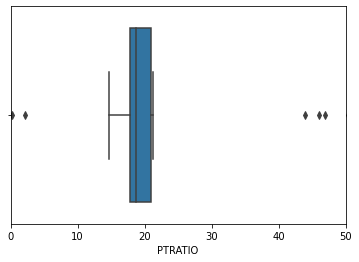

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df['PTRATIO'])
plt.xlim(0, 50)

In [10]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
first_whisker = q1-1.5*iqr
last_whisker = q3+1.5*iqr
print(q1)
print(q3)
print(first_whisker)
print(last_whisker)

CRIM         0.06762
ZN           0.00000
INDUS        4.05000
CHAS         0.00000
NOX          0.44800
RM           5.88650
AGE         44.20000
DIS          2.70125
RAD          3.00000
TAX        263.00000
PTRATIO     17.80000
Name: 0.25, dtype: float64
CRIM         0.223505
ZN          12.500000
INDUS       10.010000
CHAS         0.000000
NOX          0.538000
RM           6.455000
AGE         92.050000
DIS          5.400900
RAD          5.000000
TAX        384.000000
PTRATIO     20.900000
Name: 0.75, dtype: float64
CRIM       -0.166208
ZN        -18.750000
INDUS      -4.890000
CHAS        0.000000
NOX         0.313000
RM          5.033750
AGE       -27.575000
DIS        -1.348225
RAD         0.000000
TAX        81.500000
PTRATIO    13.150000
dtype: float64
CRIM         0.457333
ZN          31.250000
INDUS       18.950000
CHAS         0.000000
NOX          0.673000
RM           7.307750
AGE        163.825000
DIS          9.450375
RAD          8.000000
TAX        565.500000
PTRATIO

# Omission

In [13]:
reduced_df = df.dropna()
reduced_df.style.highlight_null('red')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.006320,18.000000,2.310000,0,0.538000,6.575000,65.200000,4.090000,1,296,15.300000
1,0.027310,0.000000,7.070000,0,0.469000,6.421000,78.900000,4.967100,2,242,17.800000
2,0.027290,0.000000,7.070000,0,0.469000,7.185000,61.100000,4.967100,2,242,17.800000
3,0.032370,0.000000,2.180000,0,0.458000,6.998000,45.800000,6.062200,3,222,18.700000
6,0.088290,12.500000,7.070000,0,0.524000,6.012000,66.600000,5.560500,5,311,15.200000
8,0.211240,12.500000,7.870000,0,0.524000,5.631000,100.000000,6.082100,5,311,15.200000
10,0.224890,12.500000,7.870000,0,0.524000,6.377000,94.300000,6.346700,5,311,15.200000
12,0.093780,12.500000,7.870000,0,0.524000,5.889000,39.000000,5.450900,5,311,15.200000
14,0.637960,0.000000,8.140000,0,0.538000,6.096000,84.500000,4.461900,4,307,21.000000
15,0.627390,0.000000,8.140000,0,0.538000,5.834000,56.500000,4.498600,4,307,21.000000


# Imputation

# Imputation By Mean

In [14]:
df.fillna(df.mean(), inplace=True)
df.style.highlight_null('red')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.006320,18.000000,2.310000,0,0.538000,6.575000,65.200000,4.090000,1,296,15.300000
1,0.027310,0.000000,7.070000,0,0.469000,6.421000,78.900000,4.967100,2,242,17.800000
2,0.027290,0.000000,7.070000,0,0.469000,7.185000,61.100000,4.967100,2,242,17.800000
3,0.032370,0.000000,2.180000,0,0.458000,6.998000,45.800000,6.062200,3,222,18.700000
4,0.069050,0.000000,7.070000,0,0.458000,7.147000,54.200000,4.169953,3,222,18.700000
5,0.029850,0.000000,9.122878,0,0.458000,6.430000,58.700000,6.062200,3,222,137.000000
6,0.088290,12.500000,7.070000,0,0.524000,6.012000,66.600000,5.560500,5,311,15.200000
7,0.144550,12.500000,9.122878,0,0.524000,6.172000,96.100000,5.950500,5,311,15.200000
8,0.211240,12.500000,7.870000,0,0.524000,5.631000,100.000000,6.082100,5,311,15.200000
9,0.170040,12.500000,9.122878,0,0.524000,6.004000,85.900000,6.592100,5,311,15.200000
